<a href="https://colab.research.google.com/github/fawazdhianabil/Machine-Learning-Dicoding/blob/main/MAthanabilAndiF_TugasAkhirDicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Identitas Penyusun

Salam sejahtera buat kita semua
Semoga kita selalu diberikan kesehatan dan selalu dilindungi oleh Tuhan Yang Maha Esa.

Perkenalkan saya sebagai penyusun :
Muhammad Athanabil Andi Fawazdhia
seorang Mahasiswa Matematika Komputasi yang berdomisili di Bintan, Kepulauan Riau.

Terimakasih saya ucapkan buat Indosat dan Tim Dicoding terkait beasiswa yang diberikan kepada saya sehingga saya bisa mengakses modul yang luar biasa dan mendapat ilmu baru.

In [ ]:
#Mendownload file yang ditentukan dicoding
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-06-08 08:11:38--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.33MB/s    in 4m 57s  

2021-06-08 08:16:36 (1.04 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import os
#Import os yang tujuannya untuk mengakses folder data di data set

import zipfile
#Import zipfile yang tujuannya untuk membaca file dengan format .zip

In [ ]:
##Setelah didownload tentunya data set harus diekstrak

fz = '/content/rockpaperscissors.zip'
#fz disini adalah untuk menentukan dimana letak file yang sudah didownload tadi
#dan path folder tersebut saya copy dari folder google collab

fz_ref = zipfile.ZipFile(fz,'r')
#Untuk mengekstrak file format .zip

fz_ref.extractall('/content/')
#Untuk menentukan kemana folder yang menjadi tempat mengekstrak

fz_ref.close()
#Untuk menghentikan fungsi fz_ref

##Setelah di ekstrak saya mencoba mendefinisikan folder folder yang ada

kertas = os.path.join('/content/rockpaperscissors/paper')
#Nantinya berguna untuk folder data training untuk gambar kertas/paper

batu = os.path.join('/content/rockpaperscissors/rock')
#Nantinya berguna untuk folder data training untuk gambar batu/rock

gunting = os.path.join('/content/rockpaperscissors/scissors')
#Nantinya berguna untuk folder data training untuk gambar gunting/scissors

In [ ]:
##Selanjutnya saya mencoba mencari tahu seberapa banyak file tiap folder

fk = os.listdir(kertas)
#Membuat sebuah list file berdasarkan folder kertas yang ada

fb = os.listdir(batu)
#Membuat sebuah list file berdasarkan folder batu yang ada

fg = os.listdir(gunting)
#Membuat sebuah list file berdasarkan folder gunting yang ada

##Mencoba mencari tahu berapa banyak dengan fungsi len()
print('-------------------------------------------')
#Untuk menampilkan objek string ---

print('Banyaknya file pada folder kertas = ', len(fk))
#Untuk menampilkan banyaknya file pada folder kertas/fk

print('Banyaknya file pada folder batu = ', len(fb))
#Untuk menampilkan banyaknya file pada folder batu/fb

print('Banyaknya file pada folder gunting = ', len(fg))
#Untuk menampilkan banyaknya file pada folder gunting/fg

print('-------------------------------------------')
#Untuk menampilkan objek string ---

print('Ternyata yang paling banyak, sebanyak', max(len(fk),len(fg),len(fb)),'file')
#Mencari tahu folder dengan file terbanyak dengan fungsi max()

print('Total file secara keseluruhan 3 folder sebanyak', (len(fk)+len(fg)+len(fb)), 'file')
#Menjumlahkan keseluruhan file pada 3 folder

-------------------------------------------
Banyaknya file pada folder kertas =  712
Banyaknya file pada folder batu =  726
Banyaknya file pada folder gunting =  750
-------------------------------------------
Ternyata yang paling banyak, sebanyak 750 file
Total file secara keseluruhan 3 folder sebanyak 2188 file


In [ ]:
##Selanjutanya penyusun mencoba menggunakan Image Generator
##Tetapi import dulu modul modul yang dibutuhkan 

import keras_preprocessing
#Mengimport modul keras

from keras_preprocessing import image
#Mengimport modul keras_preprocessing untuk gambar/image

from keras_preprocessing.image import ImageDataGenerator
#Mengimport modul keras_preprocessing untuk Image Generator

import tensorflow as tf
#Mengimpor modul tensorflow

In [ ]:
##Melakukan Augmentasi

mf = '/content/rockpaperscissors/rps-cv-images'
#Mendefinisikan folder utama terlebih dahulu

dt = ImageDataGenerator(
#Memanfaatkan Image Generator dan memanfaatkan fiturnya

#Perlu diketahui untuk memperhatikan argumen yang ada pada Image Generator 

    rescale = 1./300,
    #Mencoba menormalisasi data
    
    rotation_range = 90,
    #Merotasi gambar sebanyak 90 derajat

    width_shift_range = 0.2,
    #Melebarkan gambar sebanyak 20% atau 0.2

    height_shift_range = 0.2,
    #Meninggikan gambar sebanyak 20% atau 0.2

    shear_range = 0.2,
    #Memangkas gambar sebanyak 20% atau 0.2

    zoom_range=0.2,
    #Mengzoom gambar sebanyak 20% atau 0.2

    horizontal_flip = True,
    #Memutar gambar secara horizontal

    fill_mode = 'nearest',
    #Mengisi gambar yang kosong dengan gambar terdekat

    validation_split=0.4
    #Memisahkan atau memecah data menjadi...
    #60 atau 0.6 untuk data training
    #40% atau 0.4 untuk data validasi

)

In [ ]:
train_generator = dt.flow_from_directory(
#Membuat generator data training    
    
    mf,
    #Folder utama diatas kita jadikan target yang ingin digenerator

    target_size=(150,150),
    #Resolusi seluruh gambar berubah jadi 150x150

    class_mode='categorical',
    #Kelas data kategori klasfikasi

    shuffle = True, subset ='training')
    #Mencari kecocokan dan menjadikan subset nya menjadi training atau untuk data training

validation_generator = dt.flow_from_directory(
#Membuat generator data validasi
    
    mf,
    #Folder utama diatas kita jadikan target yang ingin digenerator

    target_size=(150,150),
    #Resolusi seluruh gambar berubah jadi 150x150

    class_mode='categorical',
    #Kelas data kategori klasfikasi

    shuffle = True, subset ='validation')
    #Mencari kecocokan dan menjadikan subset nya menjadi validation atau untuk data validasi 




Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
#Membuat model JST atau Jaringan Saraf Tiruan
#Menggunakan model Sequential

model = tf.keras.models.Sequential([                                            
#Membentuk model Sequential yang diminta

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Sebagai layer konvulsi pertama

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    #Sebagai layer konvolsi kedua

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Sebagai layar konvulsi ketiga

    tf.keras.layers.Flatten(),                                                  
    tf.keras.layers.Dropout(0.5),
    #Sebagai layer input untuk deep learning NN

    tf.keras.layers.Dense(128, activation='relu'),
    #Hiden layer pertama sebanyak 128 neuron

    tf.keras.layers.Dense(512, activation='relu'),
    #Hiden layer kedua sebanyak  512 neuron

    tf.keras.layers.Dense(3, activation='softmax')])
    #Sebagai layer output

model.summary()
#Mencari tahu summary dari model Sequential

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#Untuk melakukan kompilasi model

ht = model.fit(train_generator, epochs=25, steps_per_epoch=25, validation_data = validation_generator, verbose = 2, validation_steps=5)
#Melatih model JST atau Jaringan Saraf Tiruan yang sudah dibuat

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [ ]:
import matplotlib.pyplot as plt
#Import matpolib yang tujuannya untuk membantu membuat plot


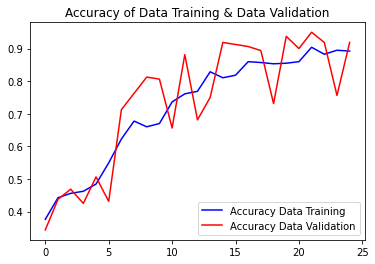

<Figure size 432x288 with 0 Axes>

In [ ]:
akurasi = ht.history['accuracy']
#Menghitung akurasi

val_akurasi = ht.history['val_accuracy']
#Menghitung akurasi validasi

loss = ht.history['loss']
#Menghitung loss

val_loss = ht.history['val_loss']
#Menghitung loss validasi

epochs = range(len(akurasi))
#Menghitung jumlah epoch dengan mencari panjang akurasi

plt.plot(epochs,akurasi,'b',label='Accuracy Data Training')
# Membuat sebuah plot akurasi

plt.plot(epochs,val_akurasi,'r', label='Accuracy Data Validation')
#Membuat sebuah plot dari akurasi validasi

plt.title('Accuracy of Data Training & Data Validation')
#Membuat judulnya

plt.legend(loc=4)
#Menentukan letak legendnya

plt.figure()
#Menggabungkan plot

plt.show()
#Menampilkan plot

Terlihat pada grafik atau plot diatas, akurasi data validasi sudah lebih dari 0.9 atau 90%

In [ ]:
import numpy as np
#Mengimport modul numpy

from google.colab import files
#Mengimport modul google colab untuk membantu mengimport file model

from keras.preprocessing import image
#Mengimport modul keras.preprocessing 

Saving Screenshot 2021-05-26 010536.png to Screenshot 2021-05-26 010536 (4).png
Ini gambar Kertas


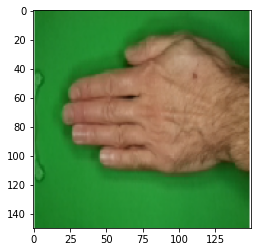

In [ ]:
##Mencoba membuat model prediksi

upload_gambar = files.upload()
#Untuk menampilkan pilihan untuk mengupload gambar

for n in upload_gambar.keys():
#Membuat sebuah perulangan for

  path = n
  #Membuat 
  
  gmbr = image.load_img(path, target_size=(150, 150))
  #Merubah ukuran gambar agar sesuai

  gmbrplot = plt.imshow(gmbr)
  #Untuk menampilkan gambar 

  x = image.img_to_array(gmbr)
  #Membuat gambar menjadi array
  x = np.expand_dims(x, axis=0)
  #Menentukan dimensinya

  gambar = np.vstack([x])
  classes = model.predict(gambar, batch_size=126)
  #Menentukan prediksi modelnya dari gambar tersebut

  if classes[0][0]==1:
  #Membuat perulangan if dengan kondisi pertama
    print('Ini gambar Kertas')
    #Jika memenuhi akan menampilkan string diatas                                
  elif classes[0][1]==1:
  #Membuat kondisi kedua
    print('Ini gambar Batu')
    #Jika memenuhi akan menampilkan string diatas                                  
  elif classes[0][2]==1:
  #Membuat kondisi ketiga
    print('Ini gambar Gunting')
    #Jika memenuhi akan menampilkan string diatas                              
  else:
  #Kondisi ke empat
    print('Bukan ketiganya')
    #Jika memenuhi akan menampilkan string diatas                                                    


Dan karena model Jaringan Syaraf Tiruan yang bertujuan untuk mengklasfikasi gambar sudah memenuhi kriteria yang di inginkan tim Dicoding sebagai tugas akhir maka menandakan tugas akhir yang penyusun susun ini sudah selesai.

Saya sadar bahwa masih banyak kekurangan yang saya dapati selama belajar modul Machine Learning untuk Pemula dan membuat tugas akhirnya, tetapi itu membuat saya bersyukur karena bisa menjadi evaluasi buat diri saya sendiri.

Kalau begitu saya Muhammad Athanabil Andi Fawazdhia sebagai penyusun mengucapkan terimakasih sekali lagi dan semoga tugas akhir saya ini dapat diterima.

Semoga kita semua selalu diberi kesehatan oleh Tuha Yang Maha Esa.